In [2]:
import csv
import numpy as np
import os
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf

from matplotlib import pyplot as plt

In [3]:
# Load MoveNet Thunder model
import script.utils as utils
from script.data import BodyPart
from script.ml import Movenet

move_net = Movenet('./model/movenet_thunder')
# Define function to run pose estimation using MoveNet Thunder.
# You'll apply MoveNet's cropping algorithm and run inference multiple times on
# the input image to improve pose estimation accuracy.
def detect(input_tensor, inference_count=3):
  _, image_width, channel = input_tensor.shape

  # Detect pose using the full input image
  move_net.detect(input_tensor.numpy(), reset_crop_region=True)

  # Repeatedly using previous detection result to identify the region of
  # interest and only cropping that region to improve detection accuracy
  per = None
  for _ in range(inference_count - 1):
    per = move_net.detect(input_tensor.numpy(), reset_crop_region=False)

  return per

In [15]:
def draw_prediction_on_image(img, per, s_path, close_figure=True):
  # Draw the detection result on top of the image.
  image_np = utils.visualize(img, [per])

  # Plot the image with detection results.
  height, width, channel = img.shape
  aspect_ratio = float(width) / height

  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  plt.axis("off")
  im = ax.imshow(image_np)

  plt.savefig(s_path)
  plt.show()

  plt.close(fig)
  # plt.clf()

  return image_np

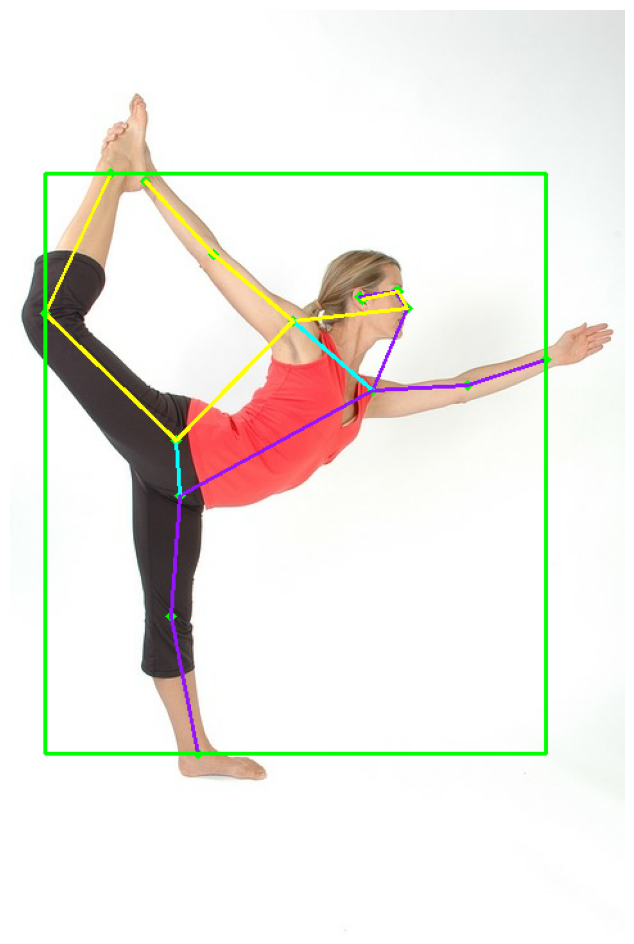

In [16]:
image = tf.io.read_file(r"./data/yoga/yoga.jpg")
image = tf.io.decode_jpeg(image)
person = detect(image)
# _ = draw_prediction_on_image(np.ones(image.shape) * 255, person, s_path="./data/mask.jpg")
_ = draw_prediction_on_image(image.numpy(), person, s_path="./data/mask.jpg")